# ID5059 Knowledge Discovery & Data Mining - Coursework 1
John Belcher-Heath (jbh6)

# Introduction

The task is to predict the price of a car from a subset of attributes from the Kaggle dataset.

I will complete the task following the ML checklist in the book, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. which is:

1. Frame the problem
2. Get the data
3. Explore the data
4. Prepare the data
5. Explore models
6. Fine-tune models
7. Present solution
8. Launch/maintain

However, for the scope of this project **8.** will only be partially completed by deploying it on the dataset but not maintaining. **7.** will be presented in an external pdf report.

# 1. Frame the problem

We want to predict the price of a car (continuos) using a small selection of attributes available to us. This makes the problem a regression problem.

Since this is a regression problem the common performance measure of Root Mean Square Error (referred to as RMSE from now on) will be used:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n(y_i - \hat{y}_i)^2}
$$

For this measure we are looking for low RMSE. This will mean small residuals and the model is a good fit for the data.

# 2. Get the data

In this section a random selection of entries from one of the large datasets will be obtained and read into a pandas.DataFrame object to explore. A random selection of the large dataset will be explored, since all we are doing is getting to know the data. Having a large amount of data to explore will be time consuming, but having too small (and non random sample) will mean our observations may not be valid. Taking a random sample of a large dataset should give a relatively good representation of the overall dataset, whilst minimising the amount of data requiring to be manipulated.

In [1]:
# Import required libraries
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn | grep -v 'already satisfied'

# Import libraries
import pandas as pd
import numpy as np
import sklearn
import os
import glob
from pathlib import Path
import math

Let's read the test data in

In [2]:
# folder_path: str = "/cs/studres/ID5059/Coursework/Coursework-1/data/2_medium" # uni
folder_path : str = r"/home/johnbh/personal_git/ID5059_coursework_1/data/2_medium" # Desktop

if not os.path.exists(folder_path):
    raise FileNotFoundError
os.chdir(folder_path)

file_names : list = [i for i in glob.glob("*.{}".format('csv'))]

original_df: pd.DataFrame = pd.read_csv(file_names[0]) # Select the first large file in the folder

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)

# check data looks roughly okay
original_df.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


Looks like everything has imported correctly. Time to explore the data

# 3. Explore the data

The data will now be inspected to explore what attributes are available to using the info output. 

Attributes with large proportion of NAs can start to be identified as well.

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25951 entries, 0 to 25950
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      25951 non-null  object 
 1   back_legroom             24549 non-null  object 
 2   bed                      237 non-null    object 
 3   bed_height               1677 non-null   object 
 4   bed_length               1677 non-null   object 
 5   body_type                25829 non-null  object 
 6   cabin                    276 non-null    object 
 7   city                     25951 non-null  object 
 8   city_fuel_economy        22046 non-null  float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             25951 non-null  int64  
 11  dealer_zip               25951 non-null  int64  
 12  description              25441 non-null  object 
 13  engine_cylinders         25188 non-null  object 
 14  engine_displacement   

In [4]:
# Explore attributes values
original_df.head(5) 

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


Initial observations from head:

- A lot of measurements contain the units, making the non-numerical
- Descriptions contain lots of irrelevant information
- A few columns seem to represent the same information
- Some attributes appear to have lots of NaNs
- Multiple ID attributes which can all be dropped
- `major_options` is a list which will need parsing somehow
- `power` contains all the info of `horsepower`
- Lots of irrelevant metadata to drop

For all attributes the units can be either seen in the data frame or read from the
[Kaggle dataset page.](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset). The main one to concern ourself with is that the price is appears to be $, this is included in the description, but can be assumed since it is US cars.

Let's split the data and assign the labels. Since we are interested in `price`, we'll use this to split the data so that both the training set and test set will have a similar portion priced cars.

Let's take a look at `price` in more detail.

<Axes: >

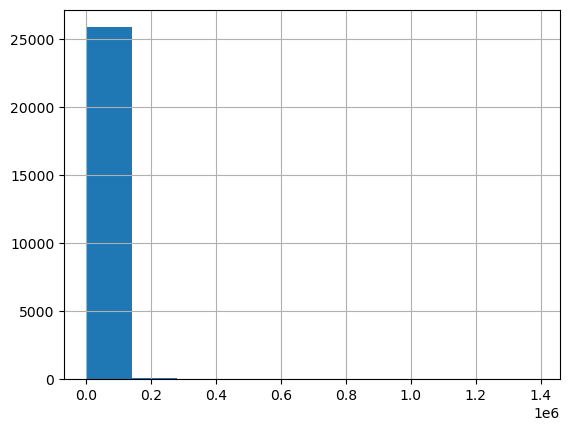

In [5]:
original_df['price'].hist()

Clearly this is very sparse towards the higher end, so let's have most of the bins for our cut at the lower end.

The bins I have chosen can be seen below, I've attempted to capture the different price categories of car. So the upto $10,000 would correspond to low-end used cars, then $20,000 more expensive used and new. Then continuing this sort of idea til $50,000 then everything after is likely high-end luxury.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up the split object
shuffled_data = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=314)

# Create some differnt price bins to split the data by price
original_df['price_category'] = pd.cut(
    original_df['price'],
    bins=[0, 10000, 20000, 30000, 50000, np.inf],
    labels=[1,2,3,4,5]
)

Let's check this split out

<Axes: >

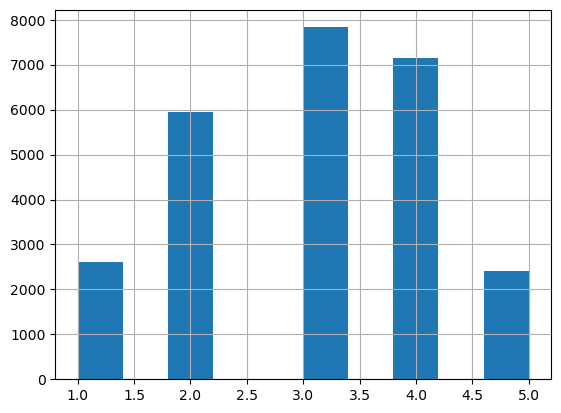

In [7]:
original_df['price_category'].hist()

This looks good, the bins looks 'full enough'

Let's do the split.

In [8]:
[(train_set_index, test_set_index )] = shuffled_data.split(original_df, original_df['price_category'])
# Take the labels from the data
prices = original_df.price.copy()
original_df.drop(columns='price', inplace=True)
stratified_train_set = original_df.loc[train_set_index]
stratified_test_set = original_df.loc[test_set_index]

Let's see if the split looks okay

In [9]:
stratified_test_set['price_category'].value_counts() / len(stratified_test_set)

3    0.301869
4    0.275284
2    0.228858
1    0.100944
5    0.093046
Name: price_category, dtype: float64

In [10]:
stratified_train_set['price_category'].value_counts() / len(stratified_train_set)

3    0.301782
4    0.275241
2    0.228998
1    0.100867
5    0.093112
Name: price_category, dtype: float64

All is good, let's continue with the exploration.

In [11]:
stratified_test_set.drop(columns='price_category', inplace=True)
stratified_train_set.drop(columns='price_category', inplace=True)
df = stratified_train_set.copy()
sample_size : int = len(df)

### Start to inspect
Firstly, let's drop all attributes from above which have less than 50% non-null values, since including these may negatively effect our model if a majority of entries do not have this attribute. Using them in our model will mean the model is not very general.

In [12]:
# Drop all attributes with less than 50% non-null values
df = df.drop(columns=df.keys()[df.count() / sample_size < 0.5])

### Data types correction
Some of the attributes appear to have been imported with different datatype, for example `zip code` as `object` not `int64`. This will be due to some integer attributes containing `NaNs`, and since the system has no interpretation for `NaNs` in `integer` types, they are taken as `object` data types instead. 

To further inspect this, all `object` data types are shown below.

In [13]:
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20760 entries, 17899 to 3380
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   vin                   20760 non-null  object
 1   back_legroom          19630 non-null  object
 2   body_type             20664 non-null  object
 3   city                  20760 non-null  object
 4   description           20345 non-null  object
 5   engine_cylinders      20154 non-null  object
 6   engine_type           20154 non-null  object
 7   exterior_color        20760 non-null  object
 8   fleet                 13008 non-null  object
 9   frame_damaged         13008 non-null  object
 10  franchise_make        14638 non-null  object
 11  front_legroom         19630 non-null  object
 12  fuel_tank_volume      19630 non-null  object
 13  fuel_type             20228 non-null  object
 14  has_accidents         13008 non-null  object
 15  height                19630 non-n

From manual inspection there are some attributes that need further inspection to check they have been given the correct type. The first 5 entries are shown below to help.

In [14]:
df.select_dtypes(include=object).head(5)

,vin,back_legroom,body_type,city,description,engine_cylinders,engine_type,exterior_color,fleet,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,interior_color,isCab,length,listed_date,listing_color,main_picture_url,major_options,make_name,maximum_seating,model_name,power,salvage,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width
17899,SCA665C59EUX84313,36.9 in,Coupe,New York,Contact Manhattan Motorcars today for informat...,V12,V12,Diamond Black,False,False,Rolls-Royce,41.5 in,21.9 gal,Gasoline,False,59.3 in,Seashell/Black Accent,False,207.9 in,2019-12-14,BLACK,https://static.cargurus.com/images/forsale/201...,"['Navigation System', 'Adaptive Suspension', '...",Rolls-Royce,4 seats,Wraith,"624 hp @ 5,600 RPM",False,Manhattan Motorcars Inc.,False,"590 lb-ft @ 1,500 RPM",A,Automatic,t52824,Coupe,RWD,Rear-Wheel Drive,122.5 in,76.7 in
8656,WBA8A3C5XJA499598,35.1 in,Sedan,Kenvil,"CARFAX 1-Owner, Excellent Condition, GREAT MIL...",I4,I4,Jet Black,False,False,BMW,42 in,15.8 gal,Gasoline,False,56.5 in,Black,False,182.8 in,2020-02-07,BLACK,https://static.cargurus.com/images/forsale/202...,"['Sunroof/Moonroof', 'Navigation System', 'Sto...",BMW,5 seats,3 Series,"180 hp @ 5,000 RPM",False,BMW of Roxbury,False,"200 lb-ft @ 1,250 RPM",A,Automatic,t75486,320i xDrive Sedan AWD,AWD,All-Wheel Drive,110.6 in,80 in
5755,WAUENAF48HN029992,35.7 in,Sedan,Great Neck,"Recent Arrival!7-Speed Automatic S tronic, qua...",I4,I4,Black,False,False,Ford,41.3 in,15.3 gal,Gasoline,True,56.2 in,Black,False,186.1 in,2020-07-03,BLACK,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Audi,5 seats,A4,"252 hp @ 5,000 RPM",False,Biener Ford,False,"273 lb-ft @ 1,600 RPM",A,Automatic,t65965,2.0T quattro Premium Plus Sedan AWD,AWD,All-Wheel Drive,111 in,79.6 in
9823,2FMPK4J91LBA49090,40.6 in,SUV / Crossover,Summit,Burgundy Velvet Metallic Tinted Clearcoat 2020...,I4,I4,Burgundy Velvet Metallic Tinted Clearcoat,False,False,Ford,42.6 in,18.5 gal,Gasoline,False,68.3 in,Black (Ebony),False,188.8 in,2020-02-19,RED,https://static.cargurus.com/images/forsale/202...,"['Navigation System', 'Adaptive Cruise Control...",Ford,5 seats,Edge,"250 hp @ 5,500 RPM",False,"Salerno Duane Ford, LLC",False,"280 lb-ft @ 3,000 RPM",A,Automatic,t87981,SEL AWD,AWD,All-Wheel Drive,112.2 in,85.8 in
11126,NM0GE9F22L1470491,37.6 in,Van,New Hudson,[!@@Additional Info@@!]Backup Camera|Bluetooth...,I4,I4,Agate Blk Met,False,False,Ford,42.3 in,15.8 gal,Gasoline,False,71.6 in,Black (Ebony Clth Frt Bkt Sts),False,190 in,2020-05-02,UNKNOWN,NaN,"['Bluetooth', 'Backup Camera', 'Remote Start']",Ford,7 seats,Transit Connect,NaN,False,Hines Park Ford,False,NaN,A,8-Speed Automatic,t85045,Wagon XLT LWB FWD with Rear Liftgate,FWD,Front-Wheel Drive,120.6 in,84.1 in


The only attribute that can be directly converted to an integer is the `dealer_zip`, this is unlikely to provide any additional information that the `lattitude` and `longitutde` will not already give so no need to convert.This is dropped from our dataset below. 

This inspection has shown that a lot of the measurements have had units included, so these attributes will need to be converted to numerical.

In [15]:
# Drop dealer_zip
try:
    df = df.drop(columns='dealer_zip')
except KeyError:
    print("Column already dropped")

In [16]:
def convert_measurement(s: str) -> float:
    """
    Converts the measuremnt with units to a numerical value
    :param s: string measurement
    :type s: str
    :return: the actual numerical value
    """
    if type(s) == str:
        s_split: list = s.split(" ")
        try:
            return float(s_split[0])
        
        # If cannot convert to dtype, ie NA then return NA
        except ValueError:
            return float('NaN')
        
    # If already converted to correct format, ie if function accidently run twice
    else:
        return s

cols_to_convert: list = ["back_legroom", "front_legroom", "fuel_tank_volume", "height", "length", 
                         "maximum_seating", "wheelbase", "width"]

In [17]:
# Apply the function to get numerical data from the string measurements
df[cols_to_convert] = df[cols_to_convert].applymap(convert_measurement)
df[cols_to_convert] = df[cols_to_convert].astype(np.float64)

It is important to note that the attributes `power` and `torque` contain numerical data, but they cannot be simply convert at this point but will be saved for later.

Next, let's drop all the irrelevant meta data and other labels which won't be helpful with our model and will instead just increase the complexity which could lead to overfitting. For example the `description`, `interior color`, `exterior color`, `vin` etc.

In [18]:
df = df.drop(columns=['description', 'interior_color', 'exterior_color', 
                      'main_picture_url', 'model_name', 'sp_name', 'transmission_display',
                      'trim_name', 'trimId', 'vin', 'sp_id', 'listing_id'])

### Fixing duplicates part 1

It is easy to see that `engine_cylinders` and `engine_type` appear to be duplicate. Similarly so do `wheel_system` and `wheel_system_display`, as well as `make_name` and `franchise_make`.

Before dropping one of each of these, the data will be further inspected to make sure that there's no discrepancy between the two in the wider data set (i.e. not just in the head).

In [19]:
df_engine = df[['engine_cylinders', 'engine_type']]
df_engine[np.logical_xor(df_engine.engine_cylinders.isna(), df_engine.engine_type.isna())].count()

engine_cylinders    0
engine_type         0
dtype: int64

So above tells us that all entries with attributes are identical in being either NA or not, so dropping one of these attributes means no information is lost.

In [20]:
df = df.drop(columns='engine_cylinders')

For the `wheel_system` and `wheel_system_display`:

In [21]:
df_wheel = df[['wheel_system', 'wheel_system_display']]
df_wheel[np.logical_xor(df_wheel.wheel_system.isna(), df_wheel.wheel_system_display.isna())].count()

wheel_system            0
wheel_system_display    0
dtype: int64

The above implies that both attributes provide the same information for the cars. Hence deciding which to drop is irrelevant. I will choose to drop the `wheel_system_display` since wheel system has a nice short appriviation.

In [22]:
df = df.drop(columns='wheel_system_display')

Finally for make.

In [23]:
df_make = df[['make_name', 'franchise_make']]
df_make[np.logical_xor(df_make.make_name.isna(), df_make.franchise_make.isna())].count()

make_name         6122
franchise_make       0
dtype: int64

From this we can see that the `make_name` has more information than the `franchise_make`, hence the `franchise_make` is dropped.

In [24]:
df = df.drop(columns='franchise_make')

### Fixing duplicates part 2

For part 2, these duplicates data may need to be extracted then compared, before just dropping attributes.

Let's inspect the engine data:

In [25]:
engine_data = df[['power', 'horsepower']]
engine_data[np.logical_xor(engine_data.power.isna(), engine_data.horsepower.isna())].count()

power            0
horsepower    1923
dtype: int64

So, luckily `horsepower` which is already numerical gives more info than power, so power can be dropped.

*\*Note: For a more complicated model, RPM could be extracted from power and then missing imputed. However,
since there is around 15% missing (see below) for this and it could have a damaging effect imputing, so it has not been included.*

In [26]:
df.power.count() / sample_size

0.8479287090558767

In [27]:
df = df.drop('power', axis=1)

In [28]:
df.horsepower.count() / sample_size

0.9405587668593449

So from above we can see that only around 5% have no `horsepower` attribute. For these remaining entries we will consider how many have engine size attributes.

In [29]:
len(df[(df['horsepower'].isna() & df['engine_type'].isna())]) / sample_size

0.022157996146435453

Now there is only a small amount of cars with neither `horsepower` or `engine_type` attribute. 

So, the `horsepower` for all cars will be assigned using the following:

- if the car has `horspower` asigned pass
- elif the car has `engine_type` assign median for that type
- else assign the overall median for `horsepower`

Let's do it:

In [30]:
df[['horsepower']] = df[['horsepower', 'engine_type']].groupby('engine_type').transform(lambda x: x.fillna(x.median()))

**Note: this is an imputation step so we don't want to use horsepower as a way to fill other NaNs as this could lead to too much creation of data and introduce bias**

Let's examine the improvements

In [31]:
df.horsepower.count() / sample_size

0.9708092485549132

Now for the final step of assigning the last na just the average of all the horsepowers:

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['horsepower']])

df[['horsepower']] = imputer.transform(df[['horsepower']])

Let's see the results

(1.0, <Axes: >)

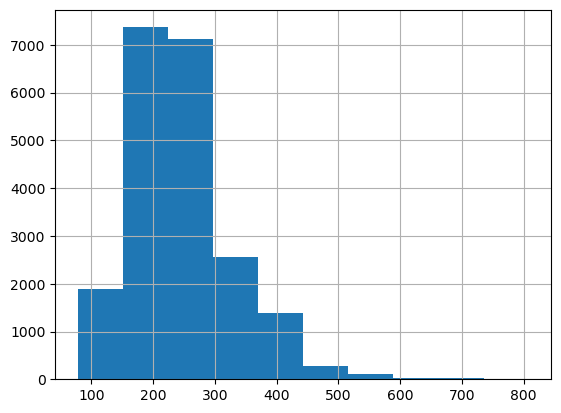

In [33]:
df.horsepower.count() / sample_size, df.horsepower.hist()

Everything looks all good!

Later on this process will be turned into a proper custom transform to interact with SciKit library.

### Object type attributes
Now we have removed some of the duplicates and corrected some of the data type issues, the `object` type attributes will be properly explored now.

In [34]:
df.select_dtypes(include=object).head(5)

,body_type,city,engine_type,fleet,frame_damaged,fuel_type,has_accidents,isCab,listed_date,listing_color,major_options,make_name,salvage,theft_title,torque,transmission,wheel_system
17899,Coupe,New York,V12,False,False,Gasoline,False,False,2019-12-14,BLACK,"['Navigation System', 'Adaptive Suspension', '...",Rolls-Royce,False,False,"590 lb-ft @ 1,500 RPM",A,RWD
8656,Sedan,Kenvil,I4,False,False,Gasoline,False,False,2020-02-07,BLACK,"['Sunroof/Moonroof', 'Navigation System', 'Sto...",BMW,False,False,"200 lb-ft @ 1,250 RPM",A,AWD
5755,Sedan,Great Neck,I4,False,False,Gasoline,True,False,2020-07-03,BLACK,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Audi,False,False,"273 lb-ft @ 1,600 RPM",A,AWD
9823,SUV / Crossover,Summit,I4,False,False,Gasoline,False,False,2020-02-19,RED,"['Navigation System', 'Adaptive Cruise Control...",Ford,False,False,"280 lb-ft @ 3,000 RPM",A,AWD
11126,Van,New Hudson,I4,False,False,Gasoline,False,False,2020-05-02,UNKNOWN,"['Bluetooth', 'Backup Camera', 'Remote Start']",Ford,False,False,NaN,A,FWD


First let's see if any of the attributes have any blaring issues with NAs.

In [35]:
df.select_dtypes(include=object).count() / sample_size

body_type        0.995376
city             1.000000
engine_type      0.970809
fleet            0.626590
frame_damaged    0.626590
fuel_type        0.974374
has_accidents    0.626590
isCab            0.626590
listed_date      1.000000
listing_color    1.000000
major_options    0.938728
make_name        1.000000
salvage          0.626590
theft_title      0.626590
torque           0.835356
transmission     0.989933
wheel_system     0.948073
dtype: float64

Clerly some of the attributes are not suitable to use since they have a low number of entries. Any object attributes with less than 80% entries are removed.

In [36]:
df.drop(columns=df.select_dtypes(include=object).loc[:, df.select_dtypes(include=object).count() / sample_size < 0.8].keys(), inplace=True)

This leaves:

In [37]:
df.select_dtypes(include=object).head(5)

,body_type,city,engine_type,fuel_type,listed_date,listing_color,major_options,make_name,torque,transmission,wheel_system
17899,Coupe,New York,V12,Gasoline,2019-12-14,BLACK,"['Navigation System', 'Adaptive Suspension', '...",Rolls-Royce,"590 lb-ft @ 1,500 RPM",A,RWD
8656,Sedan,Kenvil,I4,Gasoline,2020-02-07,BLACK,"['Sunroof/Moonroof', 'Navigation System', 'Sto...",BMW,"200 lb-ft @ 1,250 RPM",A,AWD
5755,Sedan,Great Neck,I4,Gasoline,2020-07-03,BLACK,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Audi,"273 lb-ft @ 1,600 RPM",A,AWD
9823,SUV / Crossover,Summit,I4,Gasoline,2020-02-19,RED,"['Navigation System', 'Adaptive Cruise Control...",Ford,"280 lb-ft @ 3,000 RPM",A,AWD
11126,Van,New Hudson,I4,Gasoline,2020-05-02,UNKNOWN,"['Bluetooth', 'Backup Camera', 'Remote Start']",Ford,NaN,A,FWD


Since we have `daysonmarket` attribute the `listed_date` can be dropped. Additionally, `city` can assumed to have minimal effect since most cities can be assumed to have a diverse range of individuals with varying wealth and cars. So, the price distribution will be the same across all cities.

In [38]:
df.drop(columns=['city', 'listed_date'], inplace=True)

`torque` could be useful but there is too few entries (see below) for it and it is not recorded elsewhere (like `horsepower` recorded in `power` and `engine_size`). Hence I will not use this attribute for my model

In [39]:
df.torque.count() / sample_size

0.8353564547206166

In [40]:
df.drop(columns='torque', inplace=True)

For major options, since there is so much variabilty from visual inspection of naming of products, the number of major of features will be used instead. The actual usefulness of this will be explored later. Again transformation will be formalised later.

In [41]:
df.major_options = df.major_options.apply(lambda x: len(x.split(",")) if type(x) == str else "NaN").astype(np.float64)

For the remaining attributes, these will be used as categorical attributes in the model.

In [42]:
chosen_categorical_attributes : list = df.select_dtypes(include=object).keys().to_list()

### Explore the bool values
Next let's explore the boolean attributes available

In [43]:
df.select_dtypes(include=bool).head(5)

,franchise_dealer,is_new
17899,True,False
8656,True,False
5755,True,False
9823,True,True
11126,True,True


Both these could be useful, let's see if there's any issues with NaNs

In [44]:
df.select_dtypes(include=bool).count() / sample_size

franchise_dealer    1.0
is_new              1.0
dtype: float64

Fantastic! Both these attriubtes have no NaNs so can be used straight away.

In [45]:
chosen_boolean_attributes : list = ['franchise_dealer', 'is_new']

### Exploring the numerical attributes

Now the qualitative and boolean attributes have been dealt with it's time for the quatitative attributes.

In [46]:
# Quick inspection to see which numerical are available
df.select_dtypes(include=[np.int64, np.float64])

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,major_options,maximum_seating,mileage,owner_count,savings_amount,seller_rating,wheelbase,width,year
17899,36.9,13.0,270,6600.0,41.5,21.9,59.3,21.0,624.0,40.7665,207.9,-73.9948,5.0,4.0,23832.0,4.0,51,4.860000,122.5,76.7,2014
8656,35.1,23.0,215,2000.0,42.0,15.8,56.5,34.0,180.0,40.8821,182.8,-74.6236,10.0,5.0,16360.0,1.0,1347,4.588235,110.6,80.0,2018
5755,35.7,24.0,68,2000.0,41.3,15.3,56.2,31.0,252.0,40.7830,186.1,-73.7143,6.0,5.0,41119.0,1.0,2601,3.312500,111.0,79.6,2017
9823,40.6,21.0,203,2000.0,42.6,18.5,68.3,28.0,250.0,40.7142,188.8,-74.3519,13.0,5.0,12.0,NaN,0,5.000000,112.2,85.8,2020
11126,37.6,24.0,130,1500.0,42.3,15.8,71.6,29.0,125.0,42.5220,190.0,-83.6138,3.0,7.0,0.0,NaN,0,4.769231,120.6,84.1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220,38.0,25.0,74,2500.0,42.1,14.4,57.1,34.0,202.0,40.8560,192.7,-73.1708,NaN,5.0,0.0,NaN,0,4.714286,111.2,72.4,2020
19452,44.3,14.0,4,4400.0,41.3,21.7,58.4,21.0,400.0,40.7135,205.3,-74.2304,7.0,5.0,109418.0,NaN,0,3.142857,126.4,84.0,2009
3960,38.2,21.0,70,2400.0,41.5,16.4,65.0,26.0,181.0,41.0912,176.4,-73.9504,7.0,5.0,10.0,NaN,0,3.631579,105.1,72.8,2020
2656,38.6,17.0,6,3000.0,40.3,24.6,69.4,24.0,241.0,41.0473,189.8,-73.5286,8.0,5.0,64911.0,1.0,1601,4.258065,114.8,84.8,2015


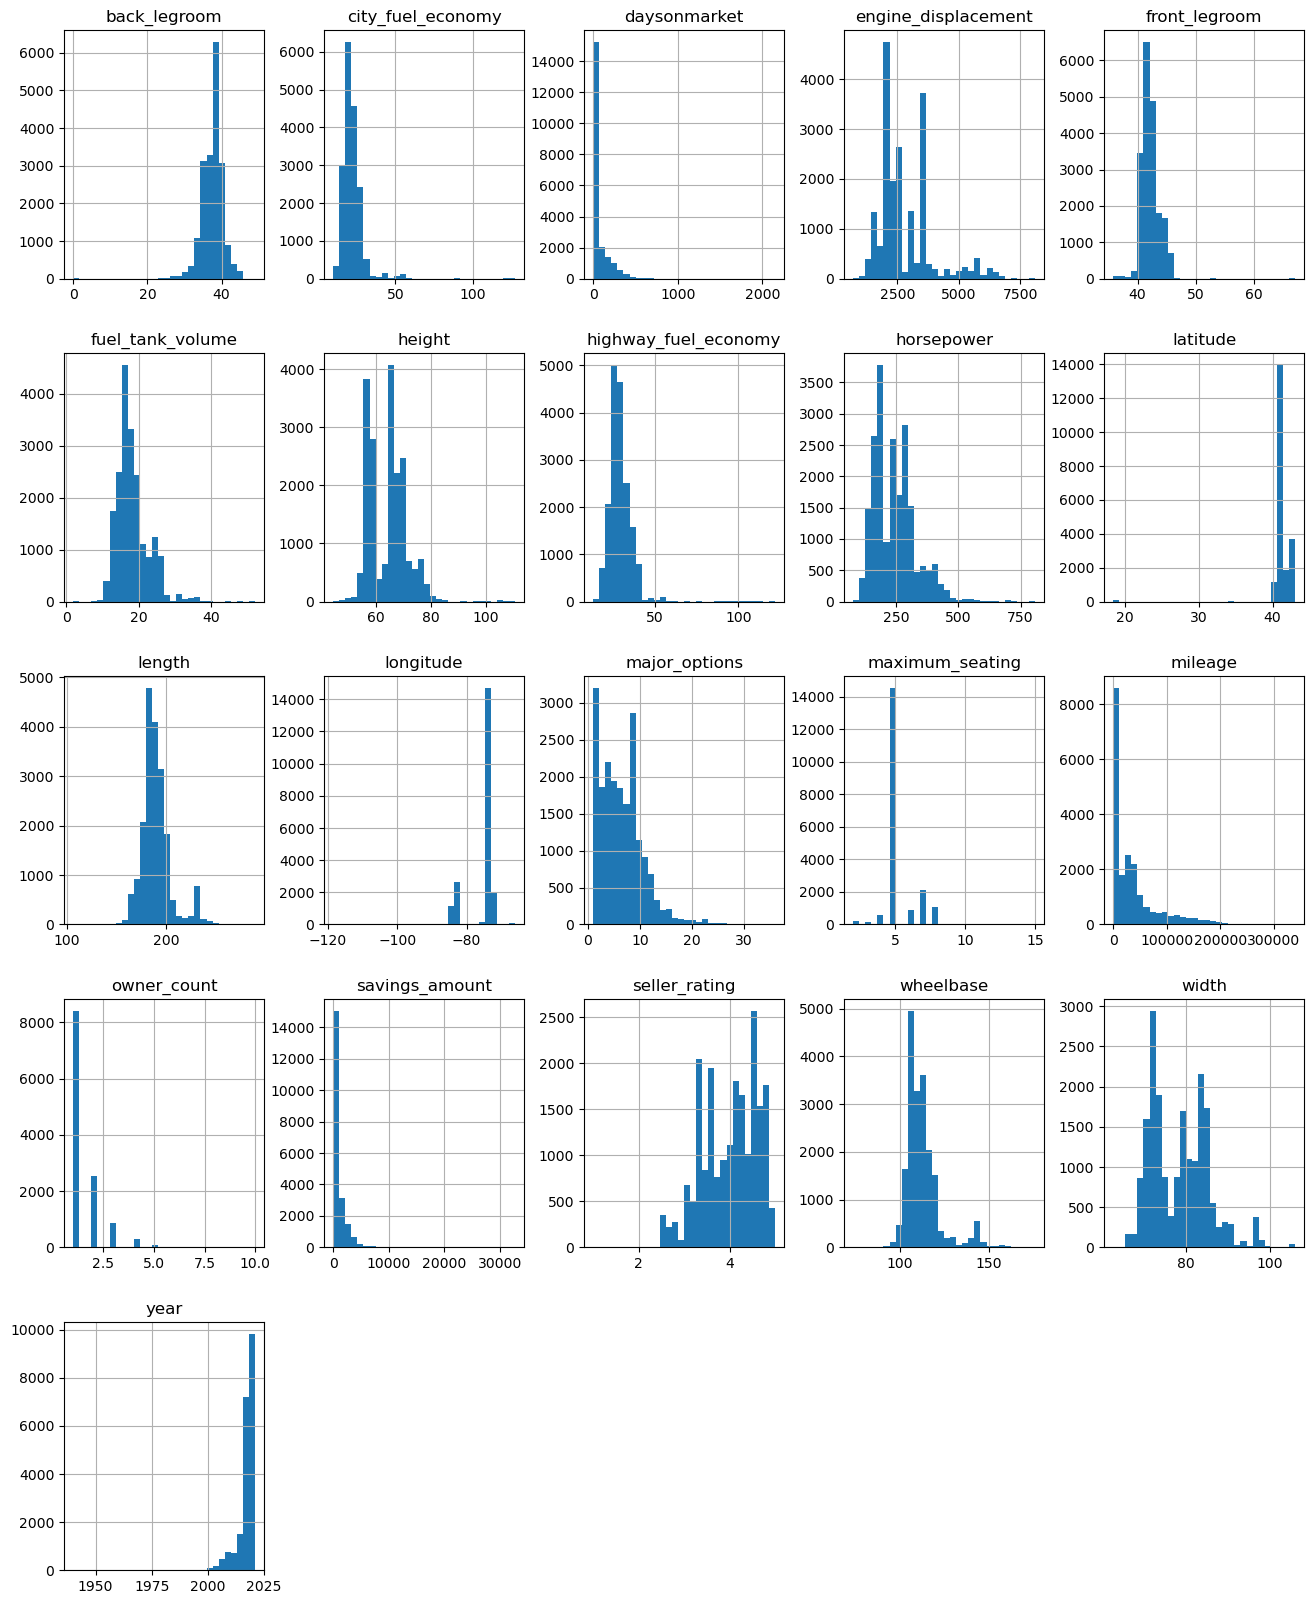

In [47]:
import matplotlib.pyplot as mpl
%matplotlib inline

df_numerical = df.select_dtypes(include=[np.int64, np.float64])
df_numerical.hist(figsize=(16,20), bins=30)
mpl.show()

Observations:
- Both Fuel economy attributes appear to be normally distributed with a slight skew
- Majority of cars do not stay on the market for a long duration, mostly less than a couple of months. Some may be above a large amount so these may need to be removed to not skew data.
- `engine_displacement` doesn't appear to have any obvious standard distribution
- `horsepower` appears to have a normal distribution around 200hp with a standard deviation of around 50hp
- `lattitude` & `longitude` appears to show that this dataset corresponds to the east coast. But as mentioned, geography should make too much of an effect the price of a car.
- `mileage` of most cars is grouped mostly around 0 and fewer cars with higher mileage, as would be expected
- `owner_count` has a modal of 1, again as to be expected
- `seller_rating` appears to be skewed negatively towards the higher end
- Majority of cars are from the last 15 years
- Modal `maximum_seating` is 5

It is clear as well that some of the bins are very sparse so will need coarser bins with labels for our model later to make sure our training set and test set have similar distributions.

In [48]:
df.select_dtypes(include=[np.float64, np.int64]).count() / sample_size

back_legroom            0.917100
city_fuel_economy       0.849807
daysonmarket            1.000000
engine_displacement     0.940559
front_legroom           0.935597
fuel_tank_volume        0.945183
height                  0.945328
highway_fuel_economy    0.849807
horsepower              1.000000
latitude                1.000000
length                  0.945328
longitude               1.000000
major_options           0.938728
maximum_seating         0.945328
mileage                 0.968979
owner_count             0.590848
savings_amount          1.000000
seller_rating           0.990703
wheelbase               0.945328
width                   0.945328
year                    1.000000
dtype: float64

Firstly it is clear to see there is no issue with NAs in the attributes: `daysonmarket`, `lattitude`, `longitude`, `savings_amount` and `year` (as well as `horsepower` after the fix above). Using contextual knowledge all of these afformentioned attributes will likely be useful in predicting the `price` attribute so will be used. 

Looking at the list of other attributes available with a low number of non-nulls. The additional attributes I believe may effect the `price` and want to explore more are:

- `city_fuel_economy` and `highway_fuel_economy` - useful metric of car performance, more powerful and expensive cars likely to have lower fuel efficiency
- `fuel_tank_volume` - bigger more expensive cars likely to have a large fuel tank, hence useful metric
- `engine_displacement` and `horsepower` (and `power` which will be used to get na values) - all similar/the same metrics for how powerful a car is
- `major_options` - more expensive cars tend to have more options
- `mileage` - more miles done the less it is valued generally
- `seller_rating` - If a seller has a better rating people may pay more than if they were to go to a seller with a poor rating.
- `length` and `width` - A measure of the size of the car. Large cars tend to be more expensive. E.g. sports cars are very wide generally.

I have chosen not to include `owner_count` since there are too few entries for this attribute. Additonally `maximum_seating` is also excluded, although small number of non-nulls, this is since cars seating will have little effect on price. Think two seat sports cars and a smart car, or a 5 seat corsa and a 5 seat golf.

### Attribute transformation
From the graphs above some attributes we have chosen to explore further need transforming so when data is scaled later they are no drastically long tails to the data. To do this the function below will be used.

**The function will be demonstrated but not applied to the data yet since there are NAs that need filling**

In [49]:
def transform_bins(pds: pd.Series, bins, min_val = None, max_val = None) -> pd.Series:
    """
    Function to transform a continuous series with sparse data to a categorical attribute with full bins.
    The absolute max is always 0 and inf to make sure all data is captured.
    :param pds: original cts data
    :param bins: number of bins in resultant series (note this is how many will be attempted to be created)
    :min_val: starting value for main section of the bins
    :max_val: ending value for main section of the bins
    :return: transformed series
    """
    bins -=1
    if min_val is not None and max_val is not None: 
        cuts: list = np.append(np.linspace(min_val, max_val, bins), np.array([np.inf])).tolist()
        cuts.insert(0,0)
    else:
        cuts: list = np.append(np.linspace(pds.quantile(0.025), pds.quantile(0.975), bins), np.array([np.inf])).tolist()
        cuts.insert(0, 0)
        
    # Drop any duplicates, ie if 0 included twice
    cuts = list(dict.fromkeys(cuts))
    labels: list = [str(i) for i in range(len(cuts)-1)]
        
    # include_lowest needed to make sure if values are 0 they're still given a label
    return pd.cut(pds, bins=cuts, labels=labels, include_lowest=True).astype(np.float64)

The attributes needing to be transformed are:

In [50]:
transform_attributes: list = ["city_fuel_economy", "highway_fuel_economy","daysonmarket", "fuel_tank_volume", 
                              "mileage", "savings_amount", "year", "major_options"]

The function will be applied in a uniform way with 30 bins for each first, these will then be inspected to see if more detailed transformation may be required

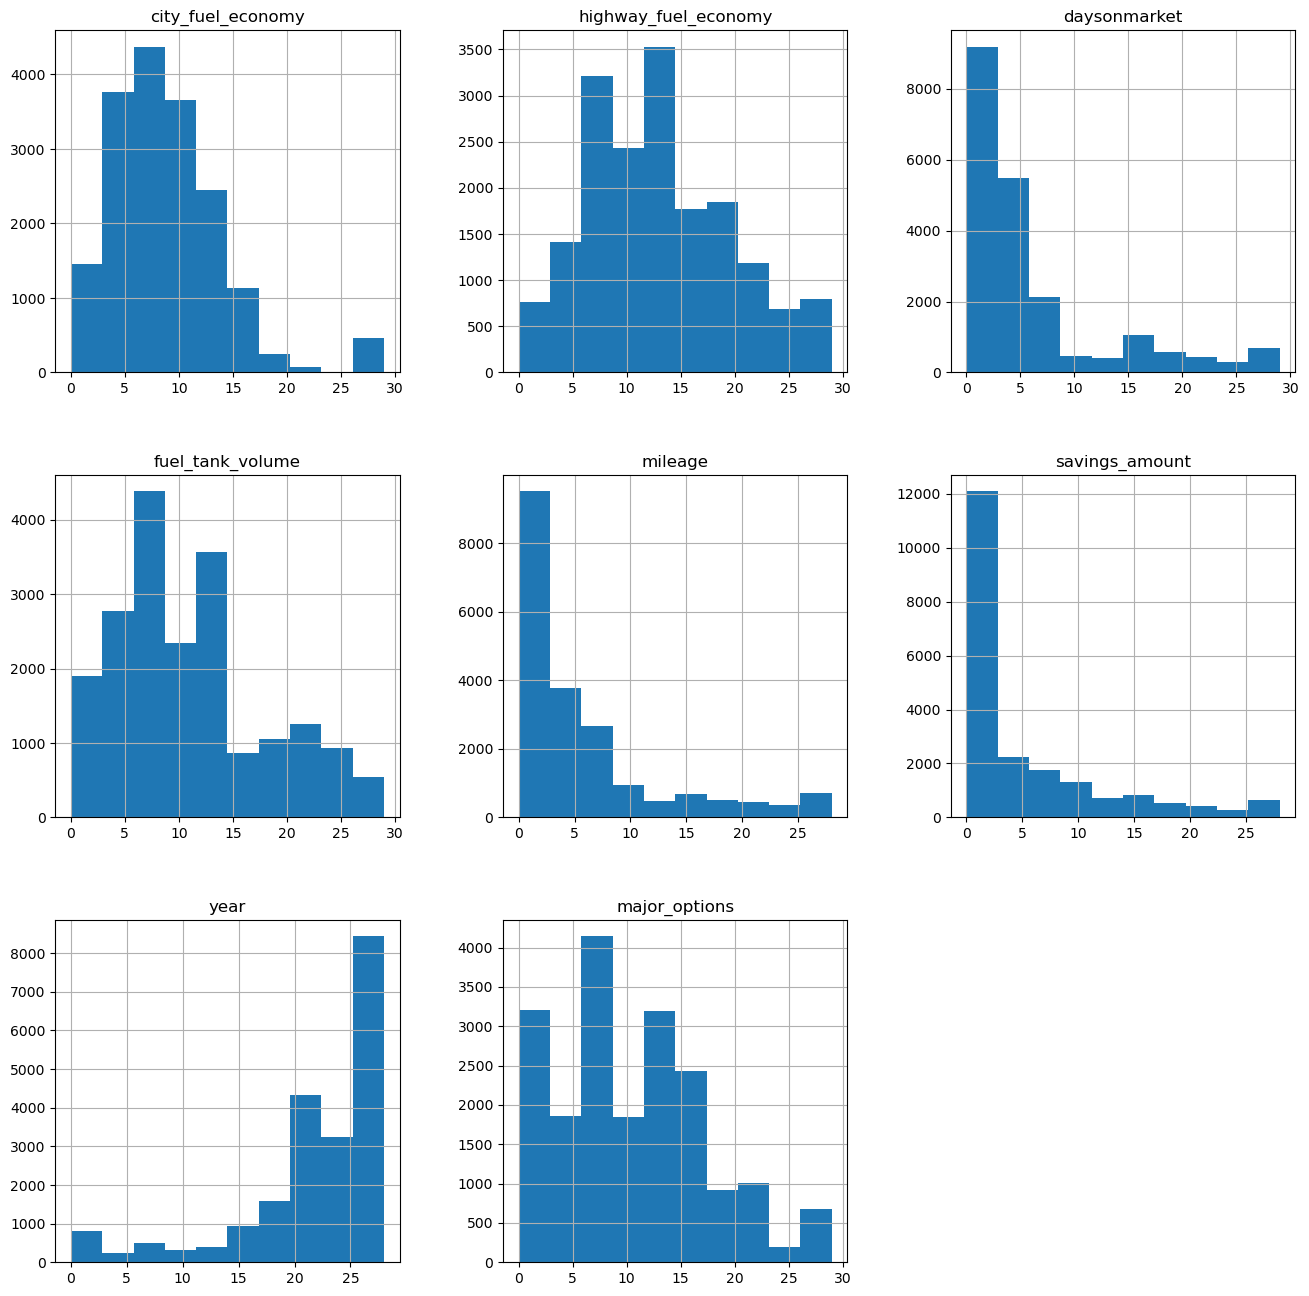

In [51]:
transformed_attr: pd.DataFrame = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
transformed_attr.hist(figsize=(16,16))
mpl.show()

These distributions look much better than before. However there may be a slight issue with `savings_amount` and `city_fuel_economy`. For this one different min, max and bins need to be used. Using contextual knowledge the following conversions are used.

In [52]:
transformed_attr[['city_fuel_economy']] = df[['city_fuel_economy']].apply(lambda x: transform_bins(x, bins=5, min_val=18, max_val=28))

In [53]:
transformed_attr[['savings_amount']] = df[['savings_amount']].apply(lambda x: transform_bins(x, bins=5, min_val=100, max_val=3000))

array([[<Axes: title={'center': 'city_fuel_economy'}>,
        <Axes: title={'center': 'highway_fuel_economy'}>,
        <Axes: title={'center': 'daysonmarket'}>],
       [<Axes: title={'center': 'fuel_tank_volume'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'savings_amount'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'major_options'}>, <Axes: >]],
      dtype=object)

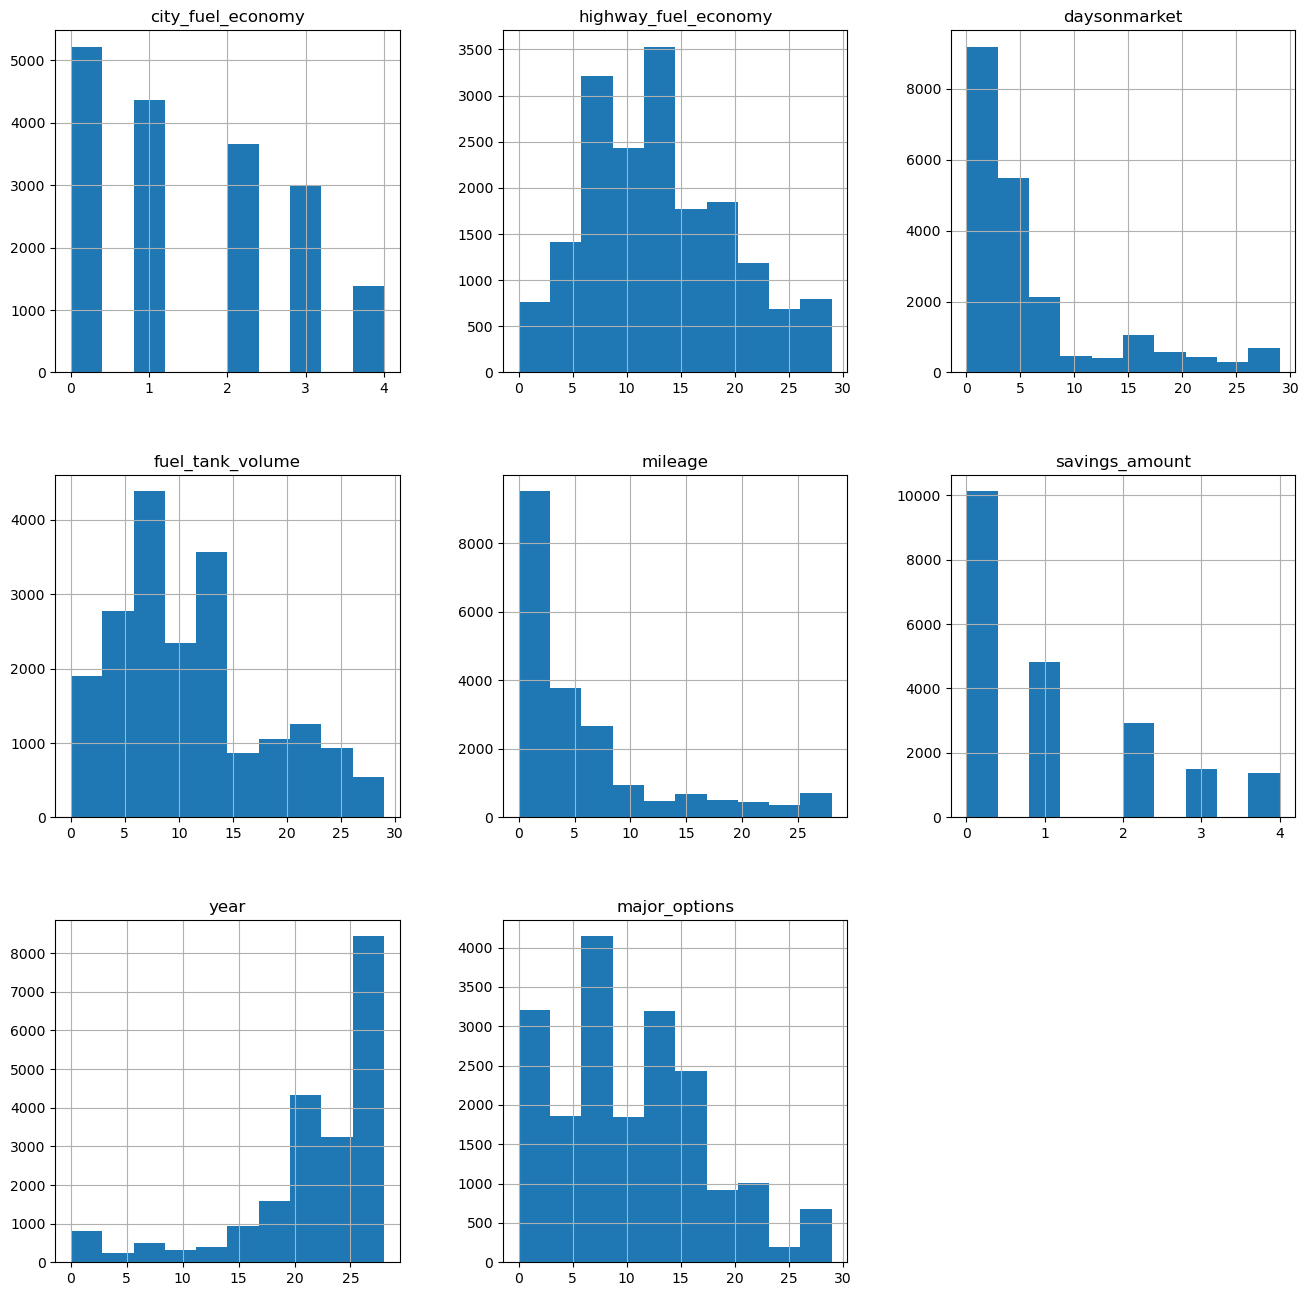

In [54]:
transformed_attr.hist(figsize=(16,16))

These look much better than before.

After all the exploratory analysis a list of attributes which are hopefully correlated to the `price` attribute have been identified. But before preperation let's take a look at the correlation between the numerical attributes and the `price` to maybe eliminate some attributes, reducing the complexity.

### Explore correlations

In [55]:
chosen_numerical_attributes : list = ['daysonmarket', 'latitude', 'longitude', 'price', 'savings_amount', 'year', 'horsepower', 'city_fuel_economy', 
'highway_fuel_economy', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'seller_rating',
'length', 'width']

In [56]:
df_numerical = df.select_dtypes(include=[np.float64, np.int64])[['daysonmarket', 'latitude', 'longitude', 'savings_amount', 'year', 'horsepower', 'city_fuel_economy', 
'highway_fuel_economy', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'seller_rating',
'length', 'width', 'wheelbase']]
# abs taken as don't care if posotive or negative effect
corr_series = abs(df_numerical.apply(lambda x: x.corr(prices)))
corr_series.sort_values()

longitude               0.027754
savings_amount          0.030088
seller_rating           0.086029
latitude                0.087532
daysonmarket            0.108075
city_fuel_economy       0.167430
highway_fuel_economy    0.223257
length                  0.254637
engine_displacement     0.256562
wheelbase               0.272147
major_options           0.281215
fuel_tank_volume        0.292510
year                    0.349523
width                   0.370052
mileage                 0.446022
horsepower              0.508268
dtype: float64

Clearly some the attributes left don't have much of a correlation
Now let's choose all attributes with a correlation of more than 0.25 and use some of our contextual knowledge to inspect.

In [57]:
corr_series[corr_series > 0.25]

year                   0.349523
horsepower             0.508268
fuel_tank_volume       0.292510
engine_displacement    0.256562
major_options          0.281215
mileage                0.446022
length                 0.254637
width                  0.370052
wheelbase              0.272147
dtype: float64

All these attributes seem to make logical sense. One attribute that could be removed is one of `wheelbase` or `length` since they represent different ways to measure the length of a car. Since wheelbase has the higher correlation, `length` will be dropped. Let's inspect the above attributes in more detail. Any attributes we had intially chosen but have are not included above will be dropped.

In [58]:
chosen_numerical_attributes = corr_series[corr_series > 0.25].keys().tolist()
chosen_numerical_attributes.remove('length')

In [59]:
df[chosen_numerical_attributes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20760 entries, 17899 to 3380
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20760 non-null  int64  
 1   horsepower           20760 non-null  float64
 2   fuel_tank_volume     19622 non-null  float64
 3   engine_displacement  19526 non-null  float64
 4   major_options        19488 non-null  float64
 5   mileage              20116 non-null  float64
 6   width                19625 non-null  float64
 7   wheelbase            19625 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


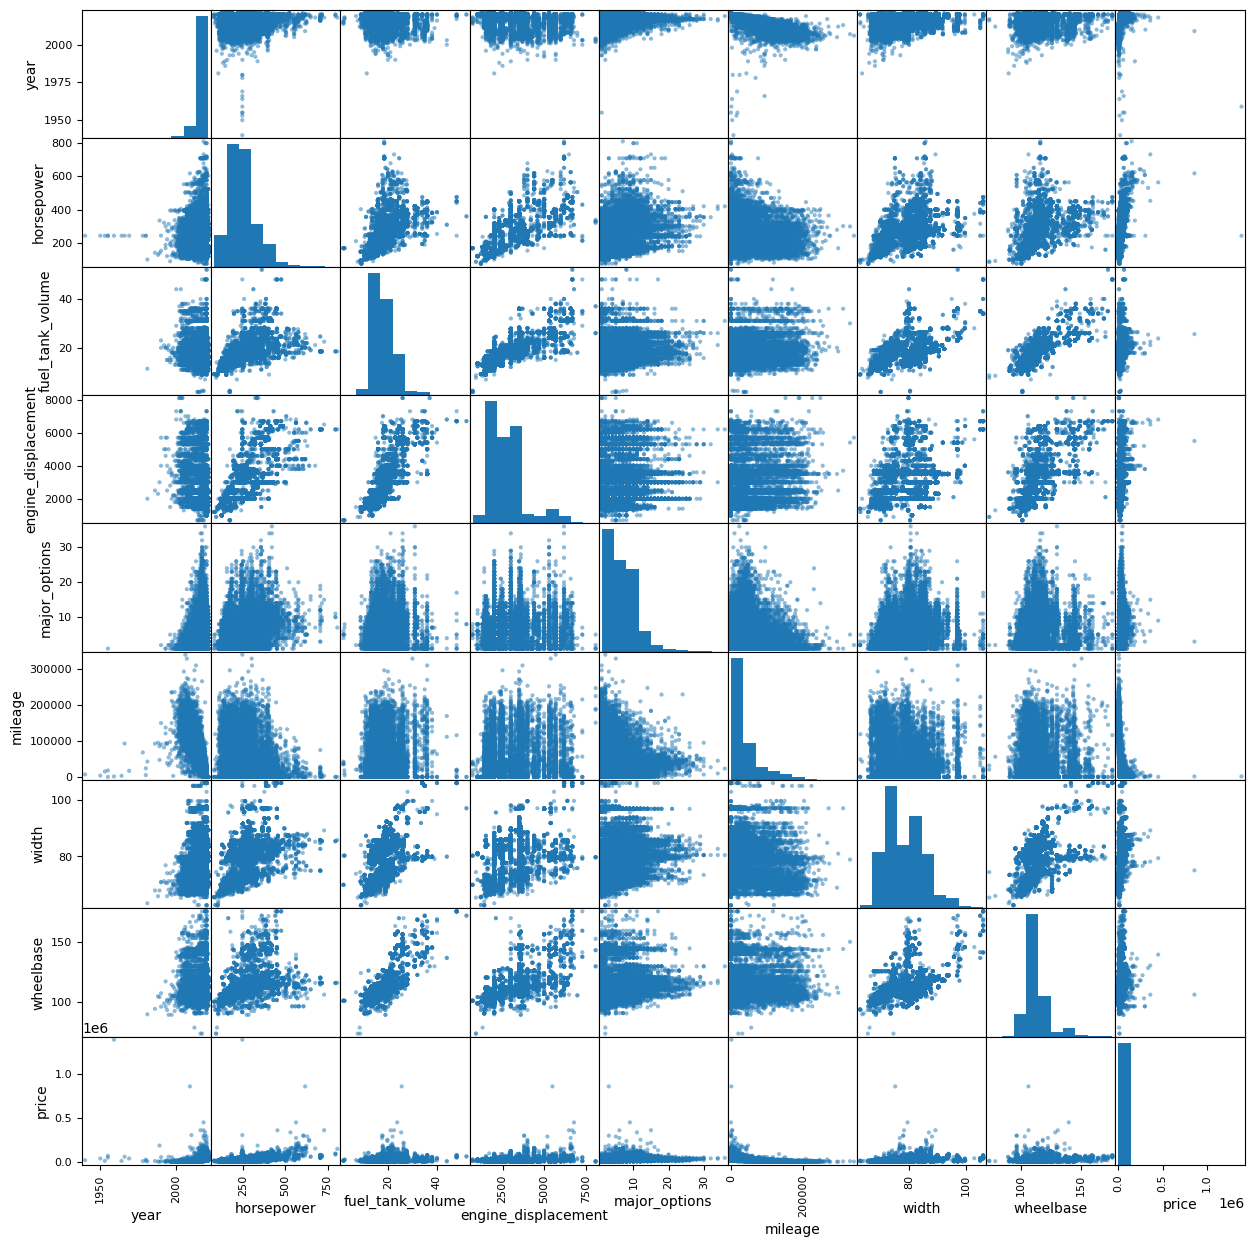

In [60]:
pd.plotting.scatter_matrix(pd.concat([df[chosen_numerical_attributes], prices], axis=1), figsize=(15,15))
mpl.show()

Inspecting the `price` row (or column), `horsepower` and `mileage` have the stongest correlation as to be expected. 
`wheelbase` and `width` appear to have similar correlation to price, which is to be expected by them being a measurement of size.

## 4. Prepare data

Now the intial exploration and some of the transformation needed have been identified. The data can start to be prepared.

In [61]:
chosen_attributes : list = chosen_numerical_attributes + chosen_categorical_attributes + chosen_boolean_attributes
df = df[chosen_attributes].copy()

Check out any remaining data values which are missing:

In [62]:
df.count() / sample_size

year                   1.000000
horsepower             1.000000
fuel_tank_volume       0.945183
engine_displacement    0.940559
major_options          0.938728
mileage                0.968979
width                  0.945328
wheelbase              0.945328
body_type              0.995376
engine_type            0.970809
fuel_type              0.974374
listing_color          1.000000
make_name              1.000000
transmission           0.989933
wheel_system           0.948073
franchise_dealer       1.000000
is_new                 1.000000
dtype: float64

### Imputation
Let's fix the null values.

Now we want to start thinking about making our pipeline, let's make some custom Imputers to act on our data. Note the imputer created will be used in place of the process for `horsepower` for ease.

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

class WithinGroupImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_var):
        self.group_var = group_var
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_ = X.copy()
        for col in X_.drop(self.group_var, axis=1).columns:
            if X_[col].dtypes == 'float64':
                # For float types impute with median of group or overall if not available
                X_.loc[(X[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].median())
                X_[col] = X_[col].fillna(X_[col].median())
            if X_[col].dtypes == 'object':
                # For object types impute with mode of group or overall if not available
                X_.loc[(X[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan))
                overall_mode = str(X_[self.group_var].mode().tolist()[0])
                # Library has issues with object atttributes and NaN so need to replace them with np.NaN explciitly
                X_.loc[:, col] = X_[col].fillna(np.nan).replace(np.nan, overall_mode)
        return X_

One important thing for imputations I have done is to make sure that any imputations are done from the raw data only, and not from other imputations. This reduces any bias introduced. So for example if the mode of groups is assigned to an attribute, the groups the cars belong to are not found by imputation themselves.

Similar to what happened for `horsepower `, `wheelbase` and `width` can assumed to be similar measures of a cars size and hence the `body_type` can be used as a proxy. This is chosen for the high number of non-null values. For any which don't have the `body_type` attribute the overall average will be used. For this imputation we will use the cust `WithinGroupImputer`.

In [64]:
body_group_imp = WithinGroupImputer(group_var='body_type')
df[['wheelbase']] = body_group_imp.fit_transform(df[['wheelbase', 'body_type']])[['wheelbase']]
df[['width']] = body_group_imp.fit_transform(df[['width', 'body_type']])[['width']]

In [65]:
# Check everything worked
df[['wheelbase', 'width']].count() / sample_size

wheelbase    1.0
width        1.0
dtype: float64

For `mileage`, `year` will be used as a proxy, with the median from that year assigned, median is used as should be a nice symmetrical distribution for each year. An example to support this is shown below.

<Axes: >

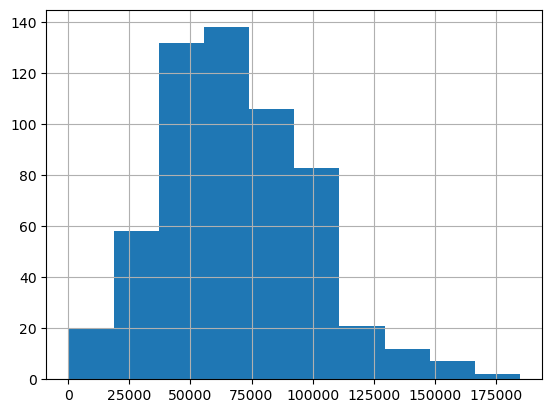

In [66]:
df[df.year == 2015].mileage.hist()

In [67]:
year_group_imp = WithinGroupImputer(group_var='year')
df[['mileage']] = year_group_imp.fit_transform(df[['mileage', 'year']])[['mileage']]

In [68]:
# Check everything worked
df.mileage.count() / sample_size

1.0

For `major_options` the median will be taken, since the number of different possible options is low and a central discrete metric is desried. For this a `SimpleImputer` is used.

In [69]:
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')
df[['major_options']] = median_imp.fit_transform(df[['major_options']])

For `wheel_system` the `body_type` will be used as a proxy, and the mode for the given body type will be taken as the value. Note this imputation is done before the imputation of `body_type` to reduce inducing bias.

In [70]:
df[['wheel_system']] = body_group_imp.fit_transform(df[['wheel_system', 'body_type']])[['wheel_system']]

For `fuel_tank_volume` this is likely proportional to the type of car, so the median of the `fuel_tank_volume` for the `body_type` can be used as proxy. Think about hatchbacks vs trucks.

In [71]:
df[['fuel_tank_volume']] = body_group_imp.fit_transform(df[['fuel_tank_volume', 'body_type']])[['fuel_tank_volume']]

Similarly for `transmission` as few entries missing, the mode will be used.

In [72]:
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['transmission']] = mode_imp.fit_transform(df[['transmission']])

For `fuel_type` let's examine the attribute in more detial

In [73]:
df.fuel_type.value_counts()

Gasoline             18998
Flex Fuel Vehicle      555
Hybrid                 459
Diesel                 107
Electric                66
Biodiesel               43
Name: fuel_type, dtype: int64

Clearly an overwhelming majority is Gasoline, so let's fill all NaNs with Gasoline. Mode impute would work as well.

In [74]:
df['fuel_type'] = df['fuel_type'].fillna('Gasoline')

For `engine_displacement` the attribute is given the median for an entry with a given `engine_type`, then filled with the overall median if no `engine_type` is present.

In [75]:
engine_group_imp = WithinGroupImputer(group_var='engine_type')
df[['engine_displacement']] = engine_group_imp.fit_transform(df[['engine_displacement', 'engine_type']])[['engine_displacement']]

Now let's deal with `engine_type`. Let's take a closer look at the options available a bit closer:

In [76]:
df.engine_type.value_counts()

I4                       10768
V6                        5522
V8                        1371
H4                         498
I4 Hybrid                  432
I6                         370
I3                         317
V8 Flex Fuel Vehicle       274
V6 Flex Fuel Vehicle       253
I5                          71
V8 Biodiesel                37
H6                          36
I4 Diesel                   34
V6 Hybrid                   27
I4 Flex Fuel Vehicle        27
V8 Diesel                   26
I6 Diesel                   24
V6 Diesel                   16
V12                         16
V10                         10
W12                          9
I2                           8
V6 Biodiesel                 5
R2                           1
I5 Biodiesel                 1
W12 Flex Fuel Vehicle        1
Name: engine_type, dtype: int64

Inital thoughts are there a lot of different categories so this may be a difficult attribute to fix. Let's explore the the relation between `make_name` and `engine_type`.

In [77]:
groups = df.groupby('make_name')
pd.set_option("display.max_rows", None)
groups.engine_type.value_counts()

make_name      engine_type          
Acura          V6                        171
               I4                         78
               V6 Hybrid                   5
Alfa Romeo     I4                        107
               V6                          1
Audi           I4                        168
               V6                         89
               V8                         20
               I4 Diesel                   5
               I5                          2
               V10                         2
               V6 Diesel                   1
BMW            I4                        581
               I6                        301
               V8                        117
               I2                          8
               I6 Diesel                   5
               I3                          3
               I4 Diesel                   3
               V10                         3
Bentley        W12                         9
               V8 

In [78]:
# Add max rows back
pd.set_option("display.max_rows", 10)

From the above with visual inspection if the mode for a given `make_name` is taken as the `engine_type` this should give a good imputation. Logically most manufactures will mass produce one or similar engine types for all vehicles to reduce production costs. Although there is some outliers in this since there is only a few to fill, this simple method is chosen.

In [79]:
make_name_imp = WithinGroupImputer(group_var='make_name')
df[['engine_type']] = make_name_imp.fit_transform(df[['engine_type', 'make_name']])[['engine_type']]

Let's check this worked okay

In [80]:
df.engine_type.value_counts()

I4                       11245
V6                        5583
V8                        1405
H4                         514
I4 Hybrid                  432
                         ...  
I2                           8
V6 Biodiesel                 5
R2                           1
I5 Biodiesel                 1
W12 Flex Fuel Vehicle        1
Name: engine_type, Length: 27, dtype: int64

That looks all good.

For `body_type` since there is very few entries missing, the mode for the attribute would make sense for this catagorical attribute.

In [81]:
df[['body_type']] = mode_imp.fit_transform(df[['body_type']])

Let's check all the data is looking good.

In [82]:
df.keys()[df.isna().any()]

Index([], dtype='object')

Fantastic, all is good!

Now all NaNs have been dealt with let's see if the transformations discussed earlier still need applying. The only attributes from before that we transformed left are:
- `fuel_tank_volume` 
- `mileage`
- `year`

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'fuel_tank_volume'}>],
       [<Axes: title={'center': 'engine_displacement'}>,
        <Axes: title={'center': 'major_options'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'wheelbase'}>, <Axes: >]], dtype=object)

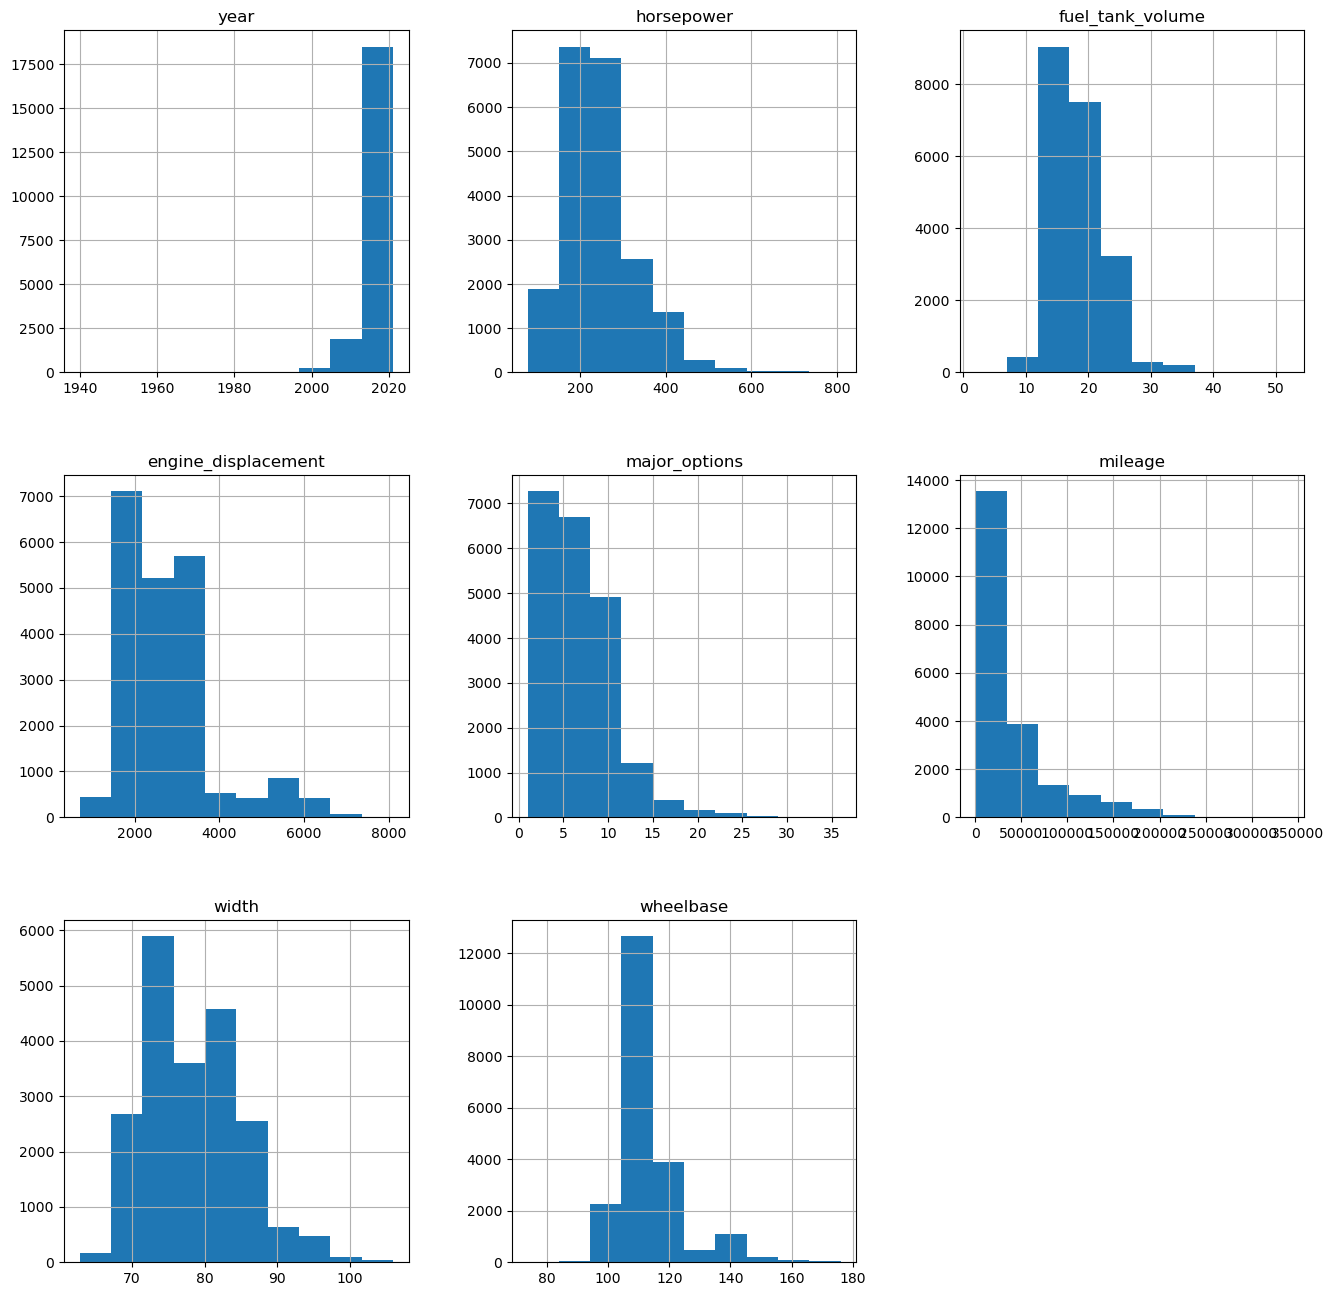

In [83]:
df.hist(figsize=(16,16))

`year` and `mileage` appear to be the only ones that still need transforming from before. Let's do it same as before:

array([[<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'major_options'}>, <Axes: >]],
      dtype=object)

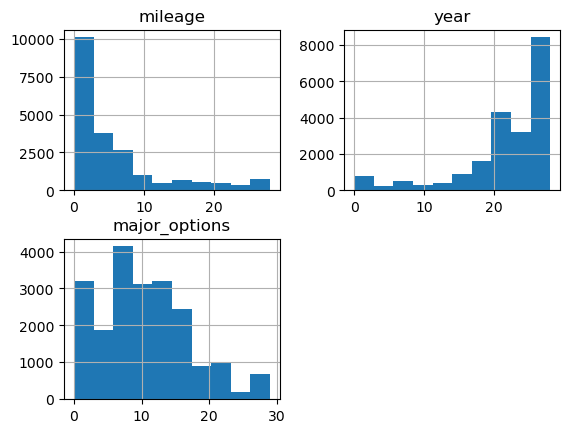

In [84]:
transform_attributes: list = ['mileage', 'year', 'major_options']
df[transform_attributes] = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
df[transform_attributes].hist()

These look much better than before.

The next step is to encode the categorical data to be meaning full.

So for all these attribute there is no intrinsic ranking. Although `engine_type` could be, there is no factual way of saying which is 'better'. So, one-hot-encoding will be used,

In [85]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

categorical_data : list = df.select_dtypes(include='object').keys().tolist()
df_categorical_encoded = one_hot_encoder.fit_transform(df[categorical_data].astype('str'))

Let's do the same for the boolean attributes now.

In [86]:
bool_data: list = df.select_dtypes(bool).keys().tolist()
df_bool_encoded = one_hot_encoder.fit_transform(df[bool_data])

Final step for our data is to scale the numerical features so the algorithgms work well. We'll go with the standardisation scaling since most of the data does not have massively large tails. The only ones that may pose an issue are mileage and year, since they do have longer tails than the others.

In [87]:
from sklearn.preprocessing import StandardScaler

numerical_data: list = df.select_dtypes(include=[np.int64, np.float64]).keys().tolist()

scaler = StandardScaler()
df_numerical_encoded = pd.DataFrame(scaler.fit_transform(df[numerical_data]), columns = numerical_data)
df_numerical_encoded.head(5)

,year,horsepower,fuel_tank_volume,engine_displacement,major_options,mileage,width,wheelbase
0,-0.998605,4.560159,0.839073,3.470206,-0.341669,-0.177595,-0.270287,0.896170
1,0.178426,-0.773825,-0.551371,-0.731161,0.972399,-0.455389,0.224810,-0.213316
2,-0.115832,0.091145,-0.665341,-0.731161,-0.049654,0.100198,0.164798,-0.176022
3,0.766941,0.067118,0.064072,-0.731161,1.848445,-0.733182,1.094980,-0.064141
4,0.766941,-1.434566,-0.551371,-1.187831,-0.925699,-0.733182,0.839930,0.719025


Let's check they look okay:

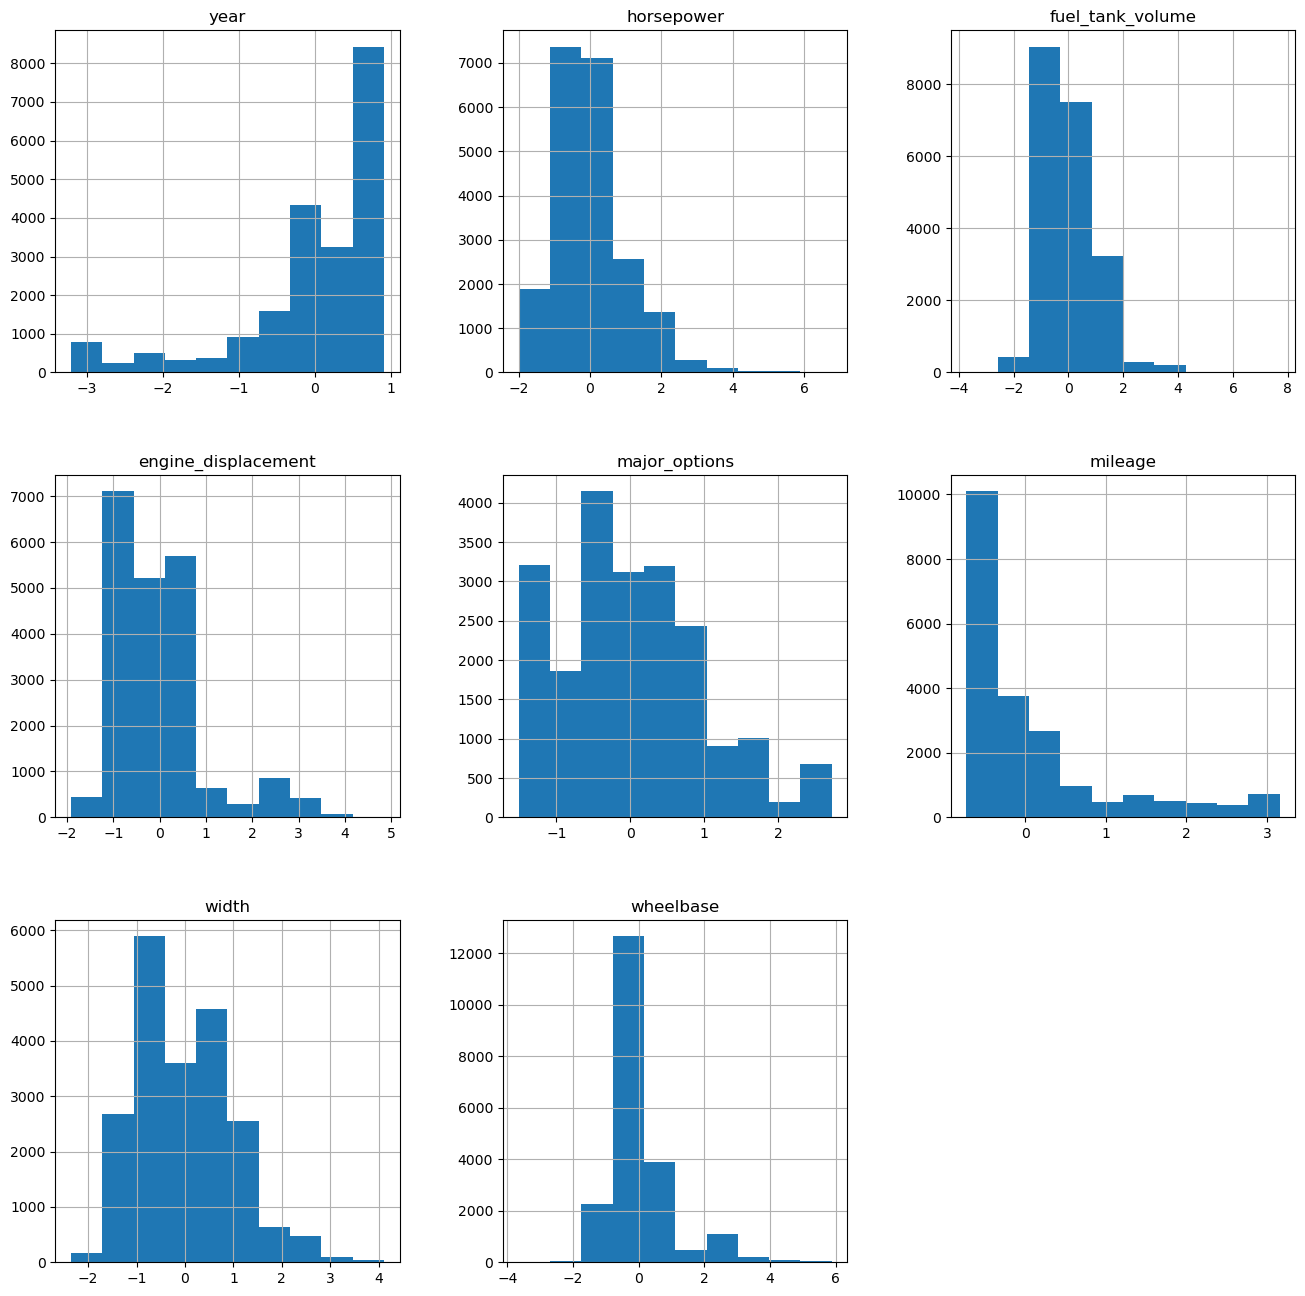

In [88]:
df_numerical_encoded.hist(figsize=(16,16))
mpl.show()

They all look good. Let's carry on.

### Transformation pipelines
Now we have figured out the data preproccessing, let's turn this into a pipeline.

Firstly, let's get the names of all the attributes we need from the dataset. And print the head of the orignial `train_set` so the index of each attribute can be seen. This is need for some section of the pipeline as the data is passed as numpy arrays, so all index and attributes need to match correctly.*

*\*We don't worry about this before as the columns are assigned directly one at a time so numpy form is no issue*

In [89]:
attributes : list = df.keys().to_list()
print(attributes)
stratified_train_set[attributes].head(5)

['year', 'horsepower', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'width', 'wheelbase', 'body_type', 'engine_type', 'fuel_type', 'listing_color', 'make_name', 'transmission', 'wheel_system', 'franchise_dealer', 'is_new']


,year,horsepower,fuel_tank_volume,engine_displacement,major_options,mileage,width,wheelbase,body_type,engine_type,fuel_type,listing_color,make_name,transmission,wheel_system,franchise_dealer,is_new
17899,2014,624.0,21.9 gal,6600.0,"['Navigation System', 'Adaptive Suspension', '...",23832.0,76.7 in,122.5 in,Coupe,V12,Gasoline,BLACK,Rolls-Royce,A,RWD,True,False
8656,2018,180.0,15.8 gal,2000.0,"['Sunroof/Moonroof', 'Navigation System', 'Sto...",16360.0,80 in,110.6 in,Sedan,I4,Gasoline,BLACK,BMW,A,AWD,True,False
5755,2017,252.0,15.3 gal,2000.0,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",41119.0,79.6 in,111 in,Sedan,I4,Gasoline,BLACK,Audi,A,AWD,True,False
9823,2020,250.0,18.5 gal,2000.0,"['Navigation System', 'Adaptive Cruise Control...",12.0,85.8 in,112.2 in,SUV / Crossover,I4,Gasoline,RED,Ford,A,AWD,True,True
11126,2020,125.0,15.8 gal,1500.0,"['Bluetooth', 'Backup Camera', 'Remote Start']",0.0,84.1 in,120.6 in,Van,I4,Gasoline,UNKNOWN,Ford,A,FWD,True,True


Next let's inspect the attributes

In [90]:
numerical_data, categorical_data, bool_data

(['year',
  'horsepower',
  'fuel_tank_volume',
  'engine_displacement',
  'major_options',
  'mileage',
  'width',
  'wheelbase'],
 ['body_type',
  'engine_type',
  'fuel_type',
  'listing_color',
  'make_name',
  'transmission',
  'wheel_system'],
 ['franchise_dealer', 'is_new'])

In [91]:
all_attributes = numerical_data + categorical_data + bool_data
all_attributes

['year',
 'horsepower',
 'fuel_tank_volume',
 'engine_displacement',
 'major_options',
 'mileage',
 'width',
 'wheelbase',
 'body_type',
 'engine_type',
 'fuel_type',
 'listing_color',
 'make_name',
 'transmission',
 'wheel_system',
 'franchise_dealer',
 'is_new']

For numerical data we need to remeber that `year`, `major_options` and `mileage` are in indicies 0, 4 and 5 respectively.

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class ExctractAttributesTransform(BaseEstimator, TransformerMixin):
    """
    Custom transformer to extract any numerical attributes from specified
    object type attributes.
    """
    
    def __init__(self):
        self.cols_to_convert = ['fuel_tank_volume', 'wheelbase', 'width']
        self.cols_to_summarise = 'major_options'
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_ = X.copy()
        X_[self.cols_to_convert] = X_[self.cols_to_convert].applymap(convert_measurement).astype(np.float64)
        X_[self.cols_to_summarise] = X_[self.cols_to_summarise].apply(lambda x: len(x.split(",")) if type(x) == str else "NaN").astype(np.float64)
        return X_

class WithinGroupImputer(BaseEstimator, TransformerMixin):
    """
    Custom transformer which returns mode of specified group attribute for a attribute
    
    ...
    
    Parameters
        ----------
            group_var : str
                the grouping attribute key
            attr : str
                the attribute for which to give mode

    """
    
    def __init__(self, group_var, attr):
        self.group_var = group_var
        self.attr = attr
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_ = X.copy()
        for col in self.attr:
            if X_[col].dtypes == 'float64':
                # For float types impute with median of group or overall if not available
                X_.loc[(X_[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].median())
                X_[col] = X_[col].fillna(X_[col].median())
            if X_[col].dtypes == 'object':
                # For object types impute with mode of group or overall if not available
                X_.loc[(X_[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan))
                overall_mode = str(X_[self.group_var].mode().tolist()[0])
                
                # Library has issues with object atttributes and NaN so need to replace them with np.NaN explciitly
                X_.loc[:, col] = X_[col].fillna(np.nan).replace(np.nan, overall_mode)
        return X_
    
class columnDropperTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer which drops specified columns
    
    Parameters
        ----------
            columns : lisy
                specified columns to drop

    """
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self 
    
    def transform(self,X):
        return X.drop(self.columns,axis=1)

class dataFix(BaseEstimator, TransformerMixin):
    """
    Custom transformer to apply custom fixes to data during pipeline
    """
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_ = X.copy()
        mask = X_['engine_type'].str.len() == 0
        overall_mode = X_['engine_type'].mode()[0]
        X_.loc[mask, 'engine_type'] = overall_mode
        return X_.astype(str) # need to convert for encoder
    
class transformNumericalAttributes(BaseEstimator, TransformerMixin):
    """
    Custom transformer which maps data with sparse bins to a set with no sparse bins.
    Used when data has long tails.
    """
    
    def __init__(self):
        # Indexes corresponding to year, mileage and major_options
        self.transform_attributes_index = [0, 4, 5]
        
    def fit(self, X, y=None):
        return self
            
    def transform(self, X):
        X_ = X.copy()
        df = pd.DataFrame(X_[:, self.transform_attributes_index]).apply(lambda x: transform_bins(x, bins=30))
        X_[:, self.transform_attributes_index] = df
        return X_

numerical_pipeline = Pipeline([
        ('extract_numericals', ExctractAttributesTransform()),
        ('impute_num_body_groupby', WithinGroupImputer('body_type', ['wheelbase', 'width', 'fuel_tank_volume'])),
        ('impute_num,_year_groupby', WithinGroupImputer('year',  ['mileage'])),
        ('impute_num_engine_groupby', WithinGroupImputer('engine_type', ['engine_displacement', 'horsepower'])),
        ('drop_grouping_attr', columnDropperTransformer(columns=['body_type', 'engine_type'])),
    
        # Fills any remaining numerical NaN with mdeian, should only apply to major_options
        # Note this step returns a numpy array so must use index from now on
        ('basic_impute', SimpleImputer(strategy='median')),
        ('transform_skewed', transformNumericalAttributes()),
        ('scaler', StandardScaler())
    ])

categorical_pipeline = Pipeline([
    ('impute_cat_body_groupby', WithinGroupImputer('body_type', ['wheel_system'])),
    ('impute_cat_make_groupby', WithinGroupImputer('make_name', ['engine_type'])),
    ('fixes', dataFix()),
    
    # Basic mode for transmission, body_type and fuel_type
    ('basic_mode_imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

bool_pipeline = Pipeline([
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, (numerical_data + ['body_type', 'engine_type'])),
    ("categorical", categorical_pipeline, categorical_data),
    ("bool", bool_pipeline, bool_data)
])

pipeline = full_pipeline.fit(stratified_train_set[all_attributes])
prepared_data = pipeline.transform(stratified_train_set[all_attributes])

Let's have a quick look at the data

In [93]:
pd.DataFrame(prepared_data.toarray()).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
0,-0.998605,4.532529,0.839073,3.470206,-0.341669,-0.177595,-0.270287,0.896170,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.178426,-0.770941,-0.551371,-0.731161,0.972399,-0.455389,0.224810,-0.213316,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.115832,0.089082,-0.665341,-0.731161,-0.049654,0.100198,0.164798,-0.176022,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.766941,0.065192,0.064072,-0.731161,1.848445,-0.733182,1.094980,-0.064141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.766941,-1.427902,-0.551371,-1.187831,-0.925699,-0.733182,0.839930,0.719025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.766941,-0.675383,-0.460194,-0.274491,0.534377,-0.733182,-0.840399,-0.157375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,-2.911281,1.199944,1.773634,2.648199,-0.049654,2.739237,0.164798,2.574383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

Clearly there is a lot of attribute, this may mean the model takes a while to fit, it could be worth reducing attributes in the future to reduce training time.

## 5. Exploring models 
### Linear regression model
Since `price` is a numerical attribute a linear regression model makes sense. Let's try this model first.

In [94]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(prepared_data, prices[train_set_index])

LinearRegression()

Let's sample some random test data from the `test_set`

In [95]:
test_data = stratified_test_set.sample(100, random_state=21)
pd.DataFrame(test_data).head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
11036,2T3G1RFV0LW132968,37.8 in,NaN,NaN,NaN,SUV / Crossover,NaN,Smithtown,27.0,NaN,10,11787,NaN,I4,2500.0,I4,Silver Sky Metallic,NaN,NaN,True,Toyota,41 in,14.5 gal,Gasoline,NaN,67 in,34.0,203.0,Black Fabric,NaN,NaN,NaN,True,NaN,40.8560,180.9 in,2020-08-30,SILVER,280809950,-73.1708,NaN,NaN,Toyota,5 seats,1.0,RAV4,NaN,NaN,NaN,0,4.714286,54592,Smithtown Toyota,NaN,NaN,A,Automatic,t89227,LE AWD,NaN,AWD,All-Wheel Drive,105.9 in,73 in,2020
2421,3LNHM26146R625413,37 in,NaN,NaN,NaN,Sedan,NaN,Teterboro,17.0,NaN,57,7608,"[!@@Additional Info@@!]Dash Trim - Leather, Da...",V6,3000.0,V6,Black,False,True,False,NaN,42.3 in,18 gal,Gasoline,True,55.9 in,26.0,221.0,Black,False,NaN,NaN,False,NaN,40.8528,190.5 in,2020-07-14,BLACK,276535420,-74.0677,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Lincoln,5 seats,131399.0,Zephyr,3.0,"221 hp @ 6,250 RPM",False,0,4.343284,289531,Jersey Motors,False,"205 lb-ft @ 4,800 RPM",A,6-Speed Automatic,t28580,Base,NaN,FWD,Front-Wheel Drive,107.4 in,72.2 in,2006
7265,5TDJZ3DC1KS220084,37.6 in,NaN,NaN,NaN,Minivan,NaN,Great Neck,18.0,NaN,49,11021,Recent Arrival!AWD.2019 Toyota Sienna LE 7 Pas...,V6,3500.0,V6,Gray,False,False,True,Ford,40.5 in,20 gal,Gasoline,True,71.3 in,24.0,296.0,Ash,False,NaN,NaN,False,NaN,40.7830,200.6 in,2020-07-22,GRAY,277237863,-73.7143,https://static.cargurus.com/images/forsale/202...,"['Adaptive Cruise Control', 'Alloy Wheels', 'T...",Toyota,7 seats,17269.0,Sienna,2.0,"296 hp @ 6,200 RPM",False,0,3.312500,438935,Biener Ford,False,"263 lb-ft @ 4,700 RPM",A,Automatic,t80312,LE 7-Passenger AWD,NaN,AWD,All-Wheel Drive,119.3 in,78.1 in,2019
15740,1GYFZFR4XLF145003,39.5 in,NaN,NaN,NaN,SUV / Crossover,NaN,Smithtown,22.0,NaN,33,11787,NaN,I4,2000.0,I4,Radiant Silver Metallic,NaN,NaN,True,Buick,40.4 in,16.3 gal,Gasoline,NaN,64.1 in,29.0,237.0,Jet Black W/cinnamon Accent,NaN,NaN,NaN,True,NaN,40.8515,181.1 in,2020-08-07,SILVER,278701015,-73.1611,NaN,NaN,Cadillac,5 seats,5.0,XT4,NaN,"237 hp @ 5,000 RPM",NaN,0,4.750000,406000,"King O'rourke Buick GMC, LLC",NaN,"258 lb-ft @ 1,500 RPM",A,9-Speed Automatic,t85738,Sport AWD,NaN,4WD,Four-Wheel Drive,109.4 in,83.5 in,2020
20643,MAJ6S3JL6LC316445,36.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Clinton Township,23.0,NaN,350,48035,Want to Save time? Complete the entire buying ...,I4,2000.0,I4,Diamond White,NaN,NaN,True,Ford,42.9 in,13.6 gal,Gasoline,NaN,65.1 in,29.0,166.0,Black (Ebony),NaN,NaN,NaN,True,NaN,42.5616,161.3 in,2019-09-25,WHITE,253174877,-82.8946,https://static.cargurus.com/images/forsale/202...,"['Sunroof/Moonroof', 'Navigation System', 'All...",Ford,5 seats,11.0,EcoSport,NaN,"166 hp @ 6,000 RPM",NaN,0,4.571429,156550,Dorian Ford,NaN,"149 lb-ft @ 4,450 RPM",A,Automatic,t85566,SES AWD,NaN,AWD,All-Wheel Drive,99.2 in,81 in,2020


In [96]:
test_labels = prices[test_data.index]
pd.DataFrame(test_labels).head(5)

,price
11036,30058.0
2421,3499.0
7265,24495.0
15740,51960.0
20643,21682.0


In [97]:
test_data_prepared = pipeline.transform(test_data)
pd.DataFrame(test_data_prepared.toarray()).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
0,0.914070,-0.496211,-0.847695,-0.274491,-0.195661,-0.733182,-0.825396,-0.651516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-3.205538,-0.281206,-0.049899,0.182180,-0.633684,2.461443,-0.945419,-0.511665,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.619812,0.614651,0.405984,0.638850,-0.487677,-0.316492,-0.060246,0.597821,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.914070,-0.090090,-0.437400,-0.731161,-0.195661,-0.733182,0.749913,-0.325196,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.914070,-0.938167,-1.052842,-0.731161,0.096354,-0.733182,0.374839,-1.276184,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [98]:
test_predictions = linear_regression.predict(test_data_prepared).round()
test_predictions[:5]

array([35130.,  1905., 31658., 45031., 25338.])

In [99]:
np.array(test_labels)[:5], test_predictions[:5]

(array([30058.,  3499., 24495., 51960., 21682.]),
 array([35130.,  1905., 31658., 45031., 25338.]))

Using our performance metric let's assess the model

In [100]:
from sklearn.metrics import mean_squared_error

linear_regression_price_predictions = linear_regression.predict(test_data_prepared)
linear_regression_mse = mean_squared_error(test_labels, linear_regression_price_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)

# Output point estimate
np.round(linear_regression_rmse)

40822.0

Whilst this is useful, it doesn't give any idea of the variance of our estimates. Let's create a function to output this. Note if the CI for the MSE encompasses negative values, which could be the case with large variance, 0 is taken as the lower and an approx CI is given.

In [101]:
from scipy import stats

# Need to use so exception is managed properly
np.seterr(all="raise")

def display_CI(y_hat : np.array, y : np.array, alpha : float) -> str:
    """
    Function which calculates alpha confidence interval for the 
    RMSE error.
    """
    mse_point : float = np.sqrt(mean_squared_error(y, y_hat)).round(2)
    sqrd_errors = (y_hat - y) ** 2
    try:
        # Try standard approach for CI
        lower, upper = np.round(np.sqrt(stats.t.interval(alpha, len(sqrd_errors) - 1, loc=sqrd_errors.mean(), 
                                      scale=stats.sem(sqrd_errors))))
        s = f"""RMSE: ${mse_point}\n{alpha*100}% CI\nLower: ${lower}\nUpper: ${upper}"""
    except FloatingPointError:
        # Return truncated interval if lower value is negative
        upper = np.round(np.sqrt(stats.t.interval(alpha, len(sqrd_errors) - 1, loc=sqrd_errors.mean(), 
                                      scale=stats.sem(sqrd_errors))[1]))     
        s = f"""RMSE: ${mse_point}\nAn approx {alpha*100}% CI\nLower: ${0}\nUpper: ${upper}"""
        
    return s

print(display_CI(y_hat=linear_regression_price_predictions, y=test_labels, alpha=0.95))

RMSE: $40822.43
An approx 95.0% CI
Lower: $0
Upper: $69866.0


Let's also output the RMSE over the median value to understand the magnitutde of the error.

In [102]:
np.round(linear_regression_rmse / test_labels.median(), 2)

1.46

We can clearly see this is quite a large RMSE, there is also a large variance. This could be that the model is a very bad fit. However, I hypothersise that this may be due to expensive cars causing issues. Think about the absolute difference between pricing a £2M car at £1.9M, this is only a 5% difference, but equates to £100,000 actual differenece.

### Aside: reasonable prices
Linking on to what was just mentioned about extremes effecting the model let's remove all extreme prices, defined to be more than $100,000.

In [103]:
restricted_data = test_data[test_labels<100000]
restricted_labels = test_labels[test_labels<100000]

Now let's try the model again.

In [104]:
linear_regression_price_predictions = linear_regression.predict(pipeline.transform(restricted_data))
linear_regression_mse = mean_squared_error(restricted_labels, linear_regression_price_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)
np.round(linear_regression_rmse)

6804.0

In [105]:
print(display_CI(y=restricted_labels, y_hat=linear_regression_price_predictions, alpha=0.95))

RMSE: $6803.68
95.0% CI
Lower: $5632.0
Upper: $7801.0


In [106]:
np.round(linear_regression_rmse / test_labels.median(), 2)

0.24

So by making this small change* to the test data we use, the RMSE has decreased drastically as well as the variance in the RMSE. This shows that for a future model it may be worth having one for cheaper and one for very expensive luxury cars. By doing it would be hoped that both models would work better than being together.

*\*see below*

In [107]:
# Change in test data
len(test_data) - len(restricted_data)

1

### Cross-validation check

Let's further examine the model using cross-validation checks.

In [108]:
# Fit the model
from sklearn.model_selection import cross_val_score

K: int = 5

linear_regression_scores = cross_val_score(linear_regression, prepared_data, prices[train_set_index],
                                           scoring="neg_mean_squared_error", cv=K)
linear_regression_rmse_scores = np.sqrt(-linear_regression_scores)

Create a function to nicely summarise this output.

In [109]:
def display_scores(scores : np.ndarray) -> None:
    """
    Function to nicely wrap scores and output them
    """
    print("Scores ($):", np.round(scores))
    print("Mean ($):", np.round(scores.mean()))
    print("Standard deviation ($):", np.round(scores.std()))

display_scores(linear_regression_rmse_scores)

Scores ($): [ 9959. 13543. 21654. 13255. 15156.]
Mean ($): 14713.0
Standard deviation ($): 3859.0


The result is still very poor, further supporting observations from before

### Decision tree model
The next model to try is a decision tree model

Firstly fit the model

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=314)
tree_regressor.fit(prepared_data, prices[train_set_index])

DecisionTreeRegressor(random_state=314)

Use cross-validation to see how well the model performs. Ignore doing just one check now we can use cross-validation which is more conclusive.

In [111]:
tree_regressor_scores = cross_val_score(tree_regressor, prepared_data, prices[train_set_index],
                         scoring="neg_mean_squared_error", cv=K)

tree_regressor_rmse_scores = np.sqrt(-tree_regressor_scores)
display_scores(tree_regressor_rmse_scores)

Scores ($): [ 8740. 13526. 22300.  7480. 13584.]
Mean ($): 13126.0
Standard deviation ($): 5209.0


This is mildly better than the results in linear regression, but still not amazing. It likely suffers from similar issues with extreme prices.

Let's try another model

### Random forest regressor
Now let's try a random forest regressor. A arbitray `n_estimators` of 50 is chosen as an intial guess. Note parallel computing is used as well by the parameter `n_jobs`, which will descrease computation time.

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


forest_regressor = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=14)

Again let's examine with cross-validation the performance

In [113]:
forest_regressor_scores = cross_val_score(forest_regressor, prepared_data, prices[train_set_index],
                                          scoring="neg_mean_squared_error", cv=K)
forest_regressor_rmse_scores = np.sqrt(-forest_regressor_scores)
display_scores(forest_regressor_rmse_scores)

Scores ($): [ 7032.  7197. 21796.  7465. 13167.]
Mean ($): 11332.0
Standard deviation ($): 5717.0


This is much better than the other two by a significant amount. Let's assess the variance further by using the CI function.

In [114]:
forest_regressor.fit(prepared_data, prices[train_set_index])
print(display_CI(y=test_labels, y_hat=forest_regressor.predict(test_data_prepared), alpha=0.95))

RMSE: $52989.51
An approx 95.0% CI
Lower: $0
Upper: $91372.0


# 6. Fine-tune models

From the preliminary exploration, the `RandomForestRegressor` appears to give the best results so let's go with that. There are some tunable hyperparameters that can be played with to improve the model.

In [115]:
from sklearn.model_selection import GridSearchCV

# Create the grid to test parameters on
parameter_grid = [
    
    # (3x3) hyperparameters to try:
    {'n_estimators': [50, 100, 200], 'max_features': [30, 50, 140]},

    # (2×3) hyperparameters with bootstrap set to False to try:
    {'bootstrap': [False], 'n_estimators': [50, 100, 200], 'max_features': [30, 50, 140]},
]

# Create regressor object
forest_regressor = RandomForestRegressor(n_jobs=14, random_state=21, verbose=1)

# Setup the regressor using all the different parameters. Cross-validation k used again
grid_search = GridSearchCV(forest_regressor, parameter_grid, cv=K,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Run the fit
grid_search.fit(prepared_data, prices[train_set_index])

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.6s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.6s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    4.2s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.6s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    3.7s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    4.2s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]

[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    4.8s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    5.5s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    4.9s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elaps

[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.6s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.6s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_

[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    1.6s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_

[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    2.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_

[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    6.9s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    7.8s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    6.9s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elaps

[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:   14.2s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:   16.2s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    2.3s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:   14.4s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elaps

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=14, random_state=21,
                                             verbose=1),
             param_grid=[{'max_features': [30, 50, 140],
                          'n_estimators': [50, 100, 200]},
                         {'bootstrap': [False], 'max_features': [30, 50, 140],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [116]:
final_model_params: dict = grid_search.best_estimator_.get_params()

Let's run the model on the whole on the data using a stratified split to make sure both the training set and test set have similar groups.

In [117]:
final_model = grid_search.best_estimator_

In [118]:
X_test_prepared = full_pipeline.transform(stratified_test_set) # Remember to use transform not fit_transform.
y_test = prices[test_set_index]

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished


This is the best result so far. But this is just a point estimate so lets look at it with a 95% CI.

In [119]:
print(display_CI(y_hat=final_predictions, y=y_test, alpha=0.95))

RMSE: $5489.29
95.0% CI
Lower: $4518.0
Upper: $6313.0


# Deploy model
Using the huge dataset the model will now be deployed and the results assessed. The model we will use is the `RandomForrestRegressor` with hyper parameters found in the previous section.

The data is already provided with a split so will assume they have been split properly to keep price groups roughly the same.

In [121]:
#huge_train : str = '/cs/studres/ID5059/Coursework/Coursework-1/data/4_huge/used_cars_data_huge_train.csv'
#huge_test : str = '/cs/studres/ID5059/Coursework/Coursework-1/data/4_huge/used_cars_data_huge_test.csv'
huge_test = '/home/johnbh/personal_git/ID5059_coursework_1/data/2_medium/used_cars_data_medium_0.csv'
huge_train = '/home/johnbh/personal_git/ID5059_coursework_1/data/3_large/used_cars_data_large_0.csv'

train_set : pd.DataFrame = pd.read_csv(huge_train, low_memory=False)[all_attributes + ['price']]
test_set : pd.DataFrame = pd.read_csv(huge_test, low_memory=False)[all_attributes + ['price']]
    
# Take the labels from the data
test_prices = test_set.price.copy()
train_prices = train_set.price.copy()

train_set.drop(columns='price', inplace=True)
test_set.drop(columns='price', inplace=True)

Now the data is ready to be used, let's set up the regressor and pipelines.

In [122]:
forest_regressor = RandomForestRegressor(n_estimators=final_model_params['n_estimators'], 
                                         bootstrap=final_model_params['bootstrap'],
                                         max_features=final_model_params['max_features'],
                                         n_jobs=14,
                                        verbose=5)

fit_pipeline = full_pipeline.fit(train_set)
prepared_data = fit_pipeline.transform(train_set)
X_test_prepared = fit_pipeline.transform(test_set)

forest_regressor.fit(prepared_data, train_prices)

[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:  3.0min


building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 10

[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:  8.2min


building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200


[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed: 11.8min finished


RandomForestRegressor(bootstrap=False, max_features=30, n_estimators=200,
                      n_jobs=14, verbose=5)

In [131]:
final_model_params

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 30,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 14,
 'oob_score': False,
 'random_state': 21,
 'verbose': 1,
 'warm_start': False}

Let's use the model on the test data and assess our model.

In [128]:
final_predictions = forest_regressor.predict(X_test_prepared)

# Output RMSE summary
print(display_CI(y=test_prices, y_hat=final_predictions, alpha=0.95))

RMSE: $4715.78
95.0% CI
Lower: $2706.0
Upper: $6095.0


The solution will be presented and explained in the accomanying project report.